In [147]:
import networkx as nx
import pandas as pd
import os
import gurobipy as gp
from gurobipy import GRB
import numpy as np

In [148]:
# Using readlines()
file1 = open('Sprint/topology.txt', 'r')
Lines = file1.readlines()
 
edges = []
# Strips the newline character
for line in Lines[1:-1]:
    to_node, from_node, cap, _ = line.split()
    edges.append((int(from_node), int(to_node), int(cap)))

In [149]:
# data = pd.read_csv('IBM/topology.txt', sep=" ", header=None)
# data.columns = ["to_node", "from_node", "capacity", "prob_failure"]

In [150]:
G = nx.DiGraph() #directed
G.add_weighted_edges_from(edges)
# nx.draw(G)
# edge_labels = nx.draw_networkx_edge_labels(G, pos=nx.circular_layout(G))
# labels = nx.draw_networkx_labels(G, pos=nx.circular_layout(G))

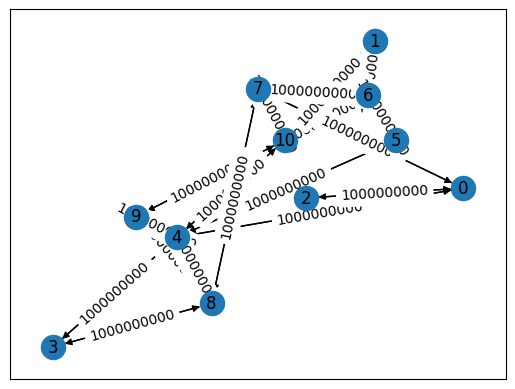

<Figure size 1500x1500 with 0 Axes>

In [151]:
import matplotlib.pyplot as plt
pos=nx.spring_layout(G) 
nx.draw_networkx(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.figure(3,figsize=(15,15))
plt.show()

In [152]:
# Using readlines()
file1 = open('Sprint/demand.txt', 'r')
line = file1.readlines()[43]
demand = [float(i) for i in line.split()]

print(len(demand))
print(demand)


# to_node, from_node, cap, _ = line.split()
# edges.append((int(to_node), int(from_node), int(cap)))

121
[54914.044043, 22388.739365, 104362.435679, 36097.284266, 18951.814223, 59129.785049, 44452.179824, 100627.563581, 15085.937182, 43054.758694, 145212.482087, 13101.234426, 8806.547291, 31970.293029, 10173.85944, 5805.681424, 19687.923698, 13617.440083, 28361.432403, 4621.412189, 13189.355373, 48350.121093, 2169.092867, 1135.528345, 9485.298296, 1830.808283, 1234.220484, 3259.611536, 2450.48816, 5547.23422, 831.633242, 2373.453379, 8005.039784, 27868.043875, 13422.552526, 68005.006236, 30202.634595, 12349.445814, 38530.352179, 26650.081046, 60328.486375, 9830.349833, 28055.488686, 94623.852783, 547937.083267, 286847.141885, 1716875.144201, 462482.619167, 368322.043114, 823414.278072, 619020.676779, 1401293.316925, 210079.844924, 599560.830776, 2022162.451741, 286006.519329, 162737.250024, 758580.26265, 241401.883898, 137755.238441, 708615.868393, 381709.359086, 731432.561095, 109655.299965, 340149.391699, 1246934.654005, 86197.25429, 45124.589641, 228622.536131, 66937.108424, 41516.

In [153]:
G2 = nx.DiGraph()
G2.add_edge(1, 2)
G2.add_edge(1, 4)
G2.add_edge(1, 3)

G2.add_edge(2, 3)
G2.add_edge(2, 4)

G2.add_edge(3, 4)

G2.add_edge(2, 1)
G2.add_edge(4, 1)
G2.add_edge(3, 1)

G2.add_edge(3, 2)
G2.add_edge(4, 2)

G2.add_edge(4, 3)

print(list(nx.dfs_edges(G2, 1)))
print(list(nx.edge_dfs(G2, 1)))
# print(list(nx.edge_dfs(G2, 2)))
# print(list(nx.edge_dfs(G2, 3)))
# print(list(nx.edge_dfs(G2, 4)))

[(1, 2), (2, 3), (3, 4)]
[(1, 2), (2, 3), (3, 4), (4, 1), (1, 4), (4, 2), (2, 4), (4, 3), (3, 1), (1, 3), (3, 2), (2, 1)]


In [154]:
for path in nx.all_simple_edge_paths(G2, 1, 4):
    print(path)

# each path is a variable

[(1, 2), (2, 3), (3, 4)]
[(1, 2), (2, 4)]
[(1, 4)]
[(1, 3), (3, 4)]
[(1, 3), (3, 2), (2, 4)]


In [155]:
edges

[(10, 9, 1000000000),
 (8, 9, 1000000000),
 (4, 9, 1000000000),
 (3, 8, 1000000000),
 (7, 8, 1000000000),
 (4, 8, 1000000000),
 (9, 8, 1000000000),
 (8, 3, 1000000000),
 (4, 3, 1000000000),
 (0, 2, 1000000000),
 (10, 1, 1000000000),
 (6, 1, 1000000000),
 (7, 0, 1000000000),
 (4, 0, 1000000000),
 (2, 0, 1000000000),
 (10, 7, 1000000000),
 (8, 7, 1000000000),
 (6, 7, 1000000000),
 (0, 7, 1000000000),
 (10, 6, 1000000000),
 (7, 6, 1000000000),
 (1, 6, 1000000000),
 (5, 6, 1000000000),
 (4, 5, 1000000000),
 (6, 5, 1000000000),
 (10, 4, 1000000000),
 (3, 4, 1000000000),
 (8, 4, 1000000000),
 (9, 4, 1000000000),
 (5, 4, 1000000000),
 (0, 4, 1000000000),
 (7, 10, 1000000000),
 (1, 10, 1000000000),
 (4, 10, 1000000000),
 (9, 10, 1000000000)]

In [156]:

demands = np.ones((10,10)) #adjacency matrix of demands
paths = [[(9,2),(2,3)], [(7,10),(10,3)],[(9,2),(2,4)]]
# Create a new model
m = gp.Model("ibm")

edges_vars = {} #maps edge to (edge var, [path vars that use it])
for (src, dest, capacity) in edges:
    edges_vars[(src, dest)] = (m.addVar(name=f'({src}, {dest})'), [])
    m.addConstr(edges_vars[(src, dest)][0] <= capacity, f'({src}, {dest})<={capacity}') #assuming >= 0 is already added)

demand_vars = {}

n = len(demands)
for i in range(n):
    for j in range(n):
        demand_vars[(i + 1, j + 1)] = (demands[i][j],[])

for (src, dest, capacity) in edges:
    edges_vars[(src, dest)] = (m.addVar(name=f'({src}, {dest})'), [])
    m.addConstr(edges_vars[(src, dest)][0] <= capacity, f'({src}, {dest})<={capacity}')

objective = 0

for path in paths:
    p = m.addVar(name=f'{path}')
    objective += p

    # add paths that try to satisfy a specific demand
    src, dest = path[0][0], path[-1][-1]
    demand_vars[(src, dest)][1].append(p)

    # this path uses edges --> need to 'credit' the edge
    for (node1, node2) in path:
        edges_vars[(node1, node2)][1].append(p)

#relating edge to path variables
for key in edges_vars:
    m.addConstr(edges_vars[key][0] == sum(edges_vars[key][1]))

# print(demand_vars)
for key in demand_vars:
    # print(demand_vars[key][0], sum(demand_vars[key][1]))
    if demand_vars[key][1]:
        m.addConstr(sum(demand_vars[key][1]) <= demand_vars[key][0])

# #demand constraint: demand over all paths from u to v <= demand from u to v
# n = len(demands)
# for i in range(n):
#     for j in range(n):
#         src, dest = i+1, j+1
#         demands = 0

# Set objective
m.setObjective(objective, GRB.MAXIMIZE)

# Optimize model
m.optimize()

for v in m.getVars():
    print('%s %g' % (v.VarName, v.X))

print('Obj: %g' % m.ObjVal)

KeyError: (9, 2)

In [ ]:
sum([])

0

In [ ]:

demands = np.ones((10,10)) #adjacency matrix of demands
paths = [[(9,2),(2,3)], [(7,10),(10,3)],[(9,2),(2,4)]]
# Create a new model
m = gp.Model("ibm")

#new variable for MLU
MLU = m.addVar(name="MLU")

edges_vars = {} #maps edge to (edge var, [path vars that use it])
for (src, dest, capacity) in edges:
    edges_vars[(src, dest)] = (m.addVar(name=f'({src}, {dest})'), [])
    m.addConstr(edges_vars[(src, dest)][0] <= capacity, f'({src}, {dest})<={capacity}') #assuming >= 0 is already added)
    m.addConstr(edges_vars[(src, dest)][0] / capacity <= MLU)

demand_vars = {}

n = len(demands)
for i in range(n):
    for j in range(n):
        demand_vars[(i + 1, j + 1)] = (demands[i][j],[])

for (src, dest, capacity) in edges:
    edges_vars[(src, dest)] = (m.addVar(name=f'({src}, {dest})'), [])
    m.addConstr(edges_vars[(src, dest)][0] <= capacity, f'({src}, {dest})<={capacity}')


for path in paths:
    p = m.addVar(name=f'{path}')

    # add paths that try to satisfy a specific demand
    src, dest = path[0][0], path[-1][-1]
    demand_vars[(src, dest)][1].append(p)

    # this path uses edges --> need to 'credit' the edge
    for (node1, node2) in path:
        edges_vars[(node1, node2)][1].append(p)

#relating edge to path variables
for key in edges_vars:
    m.addConstr(edges_vars[key][0] == sum(edges_vars[key][1]))

# print(demand_vars)
for key in demand_vars:
    # print(demand_vars[key][0], sum(demand_vars[key][1]))
    if demand_vars[key][1]:
        m.addConstr(sum(demand_vars[key][1]) <= demand_vars[key][0])

# #demand constraint: demand over all paths from u to v <= demand from u to v
# n = len(demands)
# for i in range(n):
#     for j in range(n):
#         src, dest = i+1, j+1
#         demands = 0

# Set objective
m.setObjective(MLU, GRB.MINIMIZE)

# Optimize model
m.optimize()

for v in m.getVars():
    print('%s %g' % (v.VarName, v.X))

print('Obj: %g' % m.ObjVal)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 187 rows, 96 columns and 239 nonzeros
Model fingerprint: 0xd4ac312b
Coefficient statistics:
  Matrix range     [5e-07, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 2e+06]
Presolve removed 187 rows and 96 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  0.000000000e+00
MLU 0
(2, 9) 0
(17, 9) 0
(12, 8) 0
(4, 8) 0
(10, 3) 0
(2, 3) 0
(9, 2) 0
(3, 2) 0
(4, 2) 0
(6, 1) 0
(17, 1) 0
(5, 1) 0
(7, 10) 0
(3, 10) 0
(10, 7) 0
(6, 7) 0
(1, 6) 0
(7, 6) 0
(4, 6) 0
(16, 6) 0
(1, 5) 0
(4, 